# Assignment 2

In [1]:
import os

import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
from autorank import autorank, create_report, plot_stats

In [2]:
# Reload local python files every 2 seconds
%load_ext autoreload
%autoreload 2

In [3]:
RANDOM_STATE = 1234
np.random.seed(RANDOM_STATE)

## 1. Load in Data

In [4]:
PATH_LABELS = os.path.join('datasets', 'labels_A2.csv')
labels = pd.read_csv(PATH_LABELS, sep=',', header=None)
PATH_DATA = os.path.join('datasets', 'data_A2.csv')
data = pd.read_csv(PATH_DATA, sep=',', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,NaN,-0.176595,-4.126644,-2.390884,-1.366659,-0.460177,1.521421,5.328470,-2.919639,-6.216557,...,-1.919015,-1.603442,-0.867395,-1.825951,-2.390884,4.107535,3.817897,-0.823303,-5.271267,2.353398
1,0.267386,NaN,-1.820798,1.540020,1.656770,0.447912,6.484100,2.356129,-1.129611,3.195601,...,1.394421,-1.872976,-0.382098,-1.980864,1.540020,-1.267888,-1.843256,1.105676,-0.344550,-6.653773
2,2.946515,-1.594067,NaN,0.403844,-1.733342,0.274193,2.960081,0.326221,0.393324,0.229915,...,-0.290845,-0.076589,-4.660688,-1.652196,0.403844,-4.317565,-2.506476,3.422634,-0.272146,-3.345401
3,-4.581082,-0.001274,1.197022,NaN,-0.416290,-1.941236,0.290991,0.507716,-0.397205,4.399152,...,1.046033,-4.498888,7.150844,0.722794,-2.944502,-0.081950,0.186089,-7.066950,2.488842,-2.770303
4,-2.123360,-0.266587,1.781999,-0.039342,NaN,0.895856,3.756880,-4.583167,1.652762,7.673453,...,1.371734,4.458045,3.576609,-1.538929,-0.039342,-2.613114,-3.117484,-2.125028,0.143158,-8.249535


### Imputation of Missing values

In [5]:
is_NaN = data.isnull()
data[is_NaN.any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,NaN,-0.176595,-4.126644,-2.390884,-1.366659,-0.460177,1.521421,5.328470,-2.919639,-6.216557,...,-1.919015,-1.603442,-0.867395,-1.825951,-2.390884,4.107535,3.817897,-0.823303,-5.271267,2.353398
1,0.267386,NaN,-1.820798,1.540020,1.656770,0.447912,6.484100,2.356129,-1.129611,3.195601,...,1.394421,-1.872976,-0.382098,-1.980864,1.540020,-1.267888,-1.843256,1.105676,-0.344550,-6.653773
2,2.946515,-1.594067,NaN,0.403844,-1.733342,0.274193,2.960081,0.326221,0.393324,0.229915,...,-0.290845,-0.076589,-4.660688,-1.652196,0.403844,-4.317565,-2.506476,3.422634,-0.272146,-3.345401
3,-4.581082,-0.001274,1.197022,NaN,-0.416290,-1.941236,0.290991,0.507716,-0.397205,4.399152,...,1.046033,-4.498888,7.150844,0.722794,-2.944502,-0.081950,0.186089,-7.066950,2.488842,-2.770303
4,-2.123360,-0.266587,1.781999,-0.039342,NaN,0.895856,3.756880,-4.583167,1.652762,7.673453,...,1.371734,4.458045,3.576609,-1.538929,-0.039342,-2.613114,-3.117484,-2.125028,0.143158,-8.249535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.318539,0.539550,-0.144831,1.402720,2.018928,-0.033435,-0.763604,-4.475018,1.098775,2.187650,...,1.163138,1.427695,0.753621,0.467884,1.402720,NaN,-2.008609,0.279494,4.702728,-2.272688
996,-5.843779,0.341371,-0.612153,-0.209380,-1.398469,0.550250,-1.623379,-0.924526,-2.274803,-3.090194,...,1.998539,-0.695267,1.238735,1.192938,-0.209380,-0.972033,NaN,-2.624541,0.013214,1.422758
997,3.406411,0.321762,0.286231,2.116516,-1.548059,-1.626494,3.787104,2.476920,-2.113878,-7.427621,...,-2.762413,-2.860776,-6.281361,-3.061634,2.116516,6.246774,-0.847790,NaN,-8.109827,2.108502
998,-2.167186,0.627939,-0.993588,0.902711,-1.024744,-0.416702,3.966772,6.068817,-2.394340,-1.352014,...,-0.981470,-2.427518,-0.065137,-1.653230,0.902711,1.644251,-0.421722,-3.231510,NaN,-1.626739


In [6]:
from sklearn.impute import SimpleImputer

In [7]:
# Fill with mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(data)
data = imputer.transform(data)
data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.036409,-0.176595,-4.126644,-2.390884,-1.366659,-0.460177,1.521421,5.328470,-2.919639,-6.216557,...,-1.919015,-1.603442,-0.867395,-1.825951,-2.390884,4.107535,3.817897,-0.823303,-5.271267,2.353398
1,0.267386,0.010517,-1.820798,1.540020,1.656770,0.447912,6.484100,2.356129,-1.129611,3.195601,...,1.394421,-1.872976,-0.382098,-1.980864,1.540020,-1.267888,-1.843256,1.105676,-0.344550,-6.653773
2,2.946515,-1.594067,0.539400,0.403844,-1.733342,0.274193,2.960081,0.326221,0.393324,0.229915,...,-0.290845,-0.076589,-4.660688,-1.652196,0.403844,-4.317565,-2.506476,3.422634,-0.272146,-3.345401
3,-4.581082,-0.001274,1.197022,0.242458,-0.416290,-1.941236,0.290991,0.507716,-0.397205,4.399152,...,1.046033,-4.498888,7.150844,0.722794,-2.944502,-0.081950,0.186089,-7.066950,2.488842,-2.770303
4,-2.123360,-0.266587,1.781999,-0.039342,-0.075077,0.895856,3.756880,-4.583167,1.652762,7.673453,...,1.371734,4.458045,3.576609,-1.538929,-0.039342,-2.613114,-3.117484,-2.125028,0.143158,-8.249535


### Answers
Looking at the data, it seems like there is a NaN value for each row, and this is systematic, as there is a diagnoal pattern which repeats for every 100 rows.  
Therefore, a good solution is to use a measure of central tendency to estimate the value. The impact on the data is minimised as there are 100 features, and only 1 is missing for each row.
It is not possible to ignore tuples with NaN values as there would be no data left if this approach was followed.
There is no additional information available so it is not viable to fill in the missing values manually
It is possible to use a global constant, however it is uncertain why the data is missing, and this would assume that each column represents the same value which is unknown.

## 2. Most Important Features

In [8]:
from sklearn.feature_selection import SelectKBest, chi2

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=RANDOM_STATE)

### Original

In [10]:
model1 = RandomForestClassifier(n_estimators=20, max_depth=20, random_state=RANDOM_STATE)
model1.fit(X_train, y_train)

acc_train = model1.score(X_train, y_train)
print('Accuracy on training set: {:2.2%}\n'.format(acc_train))
acc_test = model1.score(X_test, y_test)
print('Accuracy on test set: {:2.2%}\n'.format(acc_test))

Accuracy on training set: 99.88%

Accuracy on test set: 70.50%



<ipython-input-10-6c726f7e29e4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(X_train, y_train)


### SelectKBest

In [11]:
print(X_train.shape)
transformer = SelectKBest(k=10).fit(X_train, y_train)
X_train_new = transformer.transform(X_train)
X_train_new.shape

(800, 100)


C:\Users\aiden\.conda\envs\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(800, 10)

In [12]:
model2 = RandomForestClassifier(n_estimators=20, max_depth=20, random_state=RANDOM_STATE)
model2.fit(X_train_new, y_train)

X_test_new = transformer.transform(X_test)

acc_train = model2.score(X_train_new, y_train)
print('Accuracy on training set: {:2.2%}\n'.format(acc_train))
acc_test = model2.score(X_test_new, y_test)
print('Accuracy on test set: {:2.2%}\n'.format(acc_test))

Accuracy on training set: 99.62%

Accuracy on test set: 65.50%



<ipython-input-12-b5e017b4c29f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train_new, y_train)


In [13]:
# Get our new transformed data
data = transformer.transform(data)
data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.036409,-2.919639,-0.207606,-0.823303,-1.136033,-0.207606,-0.215309,-0.722900,-0.867395,-0.823303
1,0.267386,-1.129611,-0.768070,1.105676,0.267386,-0.768070,-2.245505,2.492973,-0.382098,1.105676
2,2.946515,0.393324,0.810932,3.422634,2.946515,0.810932,-3.416490,-0.247858,-4.660688,3.422634
3,-4.581082,-0.397205,2.465279,-7.066950,-4.581082,2.465279,1.198258,-1.338379,7.150844,-7.066950
4,-2.123360,1.652762,-0.643204,-2.125028,-2.123360,-0.643204,-1.122903,3.575898,3.576609,-2.125028


### Answers
SelectKBest selects features according to the k highest scores. The default selector is f_classif, which computes the ANOVA F-value for the data provided. chi2 is not feasible as it requires non-negative features. However, ANOVA f-values are a standard way of selecting features.

Compared to the original dataset, 4.5% accuracy was lost on the test set for a 90% reduction in features. The accuracy on the training set is very similar with just a 0.16% reduction.

## 3. Get Results for RandomForest, Pruned DecisionTree, Unpruned DecisionTree, and Decision Stumps

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=RANDOM_STATE)

### RandomForest

In [15]:
def createRandomForestModel(X_train, y_train, RANDOM_STATE):
    RF = RandomForestClassifier(n_estimators=20, max_depth=20, random_state=RANDOM_STATE)
    RF.fit(X_train, y_train)
    return RF

### Pruned DecisionTree
Will use min_samples_split to prune tree.
To find the best min_samples_split value to use, find the best average cross validation score.

In [16]:
def createPrunedDecisionTreeModel(X_train, y_train, RANDOM_STATE):
    best_split_size = 0
    best_score = 0
    for split_size in range(10,100):
        PDT = DecisionTreeClassifier(random_state=RANDOM_STATE, min_samples_split=split_size)
        PDT.fit(X_train, y_train)
        score = np.average(cross_val_score(PDT, X_train, y_train, cv=10))
        if score > best_score:
            best_score = score
            best_split_size = split_size
    # Train model
    PDT = DecisionTreeClassifier(random_state=RANDOM_STATE, min_samples_split=best_split_size)
    PDT.fit(X_train, y_train)
    return PDT

### Unpruned DecisionTree

In [17]:
def createUnprunedDecisionTreeModel(X_train, y_train, RANDOM_STATE):
    UDT = DecisionTreeClassifier(random_state=RANDOM_STATE)
    UDT.fit(X_train, y_train)
    return UDT

### Decision Stump

In [18]:
def createDecisionStumpModel(X_train, y_train, RANDOM_STATE):
    DS = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=1)
    DS.fit(X_train, y_train)
    return DS

### Comparing Models

In [19]:
from sklearn.model_selection import RepeatedKFold

In [20]:
def compare_models(X_train, X_test, y_train, y_test):
    rkf = RepeatedKFold(random_state=RANDOM_STATE, n_splits=10, n_repeats=10)
    y_train = y_train.values.ravel()
    
    RF = createRandomForestModel(X_train, y_train, RANDOM_STATE)
    PDT = createPrunedDecisionTreeModel(X_train, y_train, RANDOM_STATE)
    UDT = createUnprunedDecisionTreeModel(X_train, y_train, RANDOM_STATE)
    DS = createDecisionStumpModel(X_train,y_train, RANDOM_STATE)
    
    df = pd.DataFrame()
    df['RandomForest'] = cross_val_score(RF, X_train, y_train, cv=rkf)
    df['Pruned DecisionTree'] = cross_val_score(PDT, X_train, y_train, cv=rkf)
    df['Unpruned DecisionTree'] = cross_val_score(UDT, X_train, y_train, cv=rkf)
    df['Decision Stump'] = cross_val_score(DS, X_train, y_train, cv=rkf)
    # Show results
    result = autorank(df, verbose=False)
    print(result)
    create_report(result)
    plot_stats(result)
    printTestScores(RF, PDT, UDT, DS, X_test, y_test)
    return df
def printTestScores(RF, PDT, UDT, DS, X_test, y_test):
    print("\n")
    scores = RF.score(X_test, y_test)
    print('RandomForest acc on test set:     {:.2f}'.format(scores))
    scores = PDT.score(X_test, y_test)
    print('Pruned DecisionTree acc on test set:     {:.2f}'.format(scores))
    scores = UDT.score(X_test, y_test)
    print('Unpruned DecisionTree acc on test set:     {:.2f}'.format(scores))
    scores = DS.score(X_test, y_test)
    print('Decision Stump acc on test set:     {:.2f}'.format(scores))

RankResult(rankdf=
                       meanrank      mean       std  ci_lower  ci_upper  \
RandomForest              1.515  0.669875  0.048983  0.657413  0.682337   
Pruned DecisionTree       1.955  0.648125  0.055002  0.634132  0.662118   
Unpruned DecisionTree     2.845  0.605875  0.057088  0.591351  0.620399   
Decision Stump            3.685  0.559500  0.043957  0.548317  0.570683   

                      effect_size   magnitude  
RandomForest                  0.0  negligible  
Pruned DecisionTree      0.417634       small  
Unpruned DecisionTree    1.203239       large  
Decision Stump           2.371741       large  
pvalue=2.6665159015190102e-37
cd=0.46903593329832804
omnibus=friedman
posthoc=nemenyi
all_normal=True
pvals_shapiro=[0.22651080787181854, 0.029995987191796303, 0.17797085642814636, 0.14355461299419403]
homoscedastic=False
pval_homogeneity=0.04445466146540819
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.0125
num_samples=100
posterior_matrix=
None
decisio

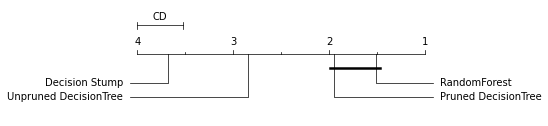

In [21]:
results = compare_models(X_train, X_test, y_train, y_test)

### Answers
Based on cross validation scores, random forest and pruned decision tree are the best methods for the dataset, with unpruned decision tree and decision stump being significantly worse.  
However, looking at the scores on the test data, it can be oserved that again random forest performed the best, however now decision stump performs relatively well. This may be due to random chance or the distribution of the test set. The unpruned decision tree performs the worst.

Decision trees have an issue of being too simple to predict interactions, as they only have one branch to classify the data. This means that all 9 other features are not being considered when classifying. Unpruned decision trees both have the problem of overfitting, where the model has become effective on the training data but is not effective against test data (as shown) because the model is not generalisable.

## 4. 20% Normal Additive Noise

In [22]:
def additiveNoise(X):
    noise = np.random.normal(0, 0.2, np.shape(X))
    return X + np.multiply(noise, np.average(X, axis=0))
X_noise = additiveNoise(data)
print(X_noise.shape)

(1000, 10)


### Comparing Models

RankResult(rankdf=
                       meanrank      mean       std  ci_lower  ci_upper  \
RandomForest              1.480  0.670625  0.044713  0.659249  0.682001   
Pruned DecisionTree       2.185  0.631625  0.056922  0.617143  0.646107   
Unpruned DecisionTree     2.765  0.606000  0.059525  0.590856  0.621144   
Decision Stump            3.570  0.563125  0.045587  0.551527  0.574723   

                      effect_size   magnitude  
RandomForest                  0.0  negligible  
Pruned DecisionTree      0.761974      medium  
Unpruned DecisionTree     1.22762       large  
Decision Stump           2.380821       large  
pvalue=2.8504126955924703e-31
cd=0.46903593329832804
omnibus=friedman
posthoc=nemenyi
all_normal=True
pvals_shapiro=[0.11639333516359329, 0.31419607996940613, 0.4203834533691406, 0.06104124337434769]
homoscedastic=False
pval_homogeneity=0.004931026413083032
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.0125
num_samples=100
posterior_matrix=
None
decision

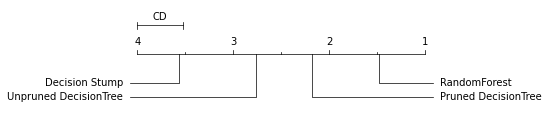

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_noise, labels, test_size=0.2, random_state=RANDOM_STATE)
additive_results = compare_models(X_train, X_test, y_train, y_test)

RankResult(rankdf=
                                      meanrank   median       mad ci_lower  \
RandomForest                            1.9875  0.67500  0.055597   0.6625   
Additive Noise RandomForest             2.4600  0.67500       NaN      0.7   
Pruned DecisionTree                     2.9125  0.63750  0.055598   0.6125   
Additive Noise Pruned DecisionTree      3.8700  0.62500       NaN   0.6625   
Unpruned DecisionTree                   3.9375  0.61250  0.055598   0.5875   
Additive Noise Unpruned DecisionTree    5.0300  0.61250       NaN     0.65   
Decision Stump                          5.1625  0.56250  0.037065     0.55   
Additive Noise Decision Stump           6.6400  0.56875       NaN   0.5875   

                                     ci_upper effect_size   magnitude  
RandomForest                           0.6875         0.0  negligible  
Additive Noise RandomForest               NaN         NaN       large  
Pruned DecisionTree                    0.6625    0.674491     

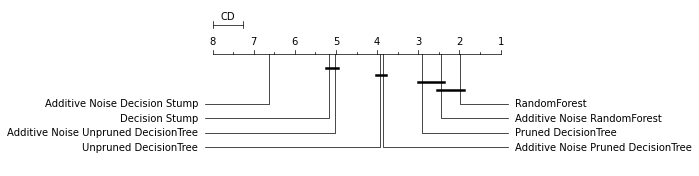

In [24]:
for result in additive_results:
    additive_results["Additive Noise " + result] = additive_results[result]
# Show results
combined = pd.concat([results, additive_results])
result = autorank(combined, verbose=False)
print(result)
create_report(result)
plot_stats(result)

### Answers 

Something interesting that we observe is that all methods are now significantly different. The overall results though are similar to the test without noise as expected

Comparing the results of additive noise to the base method, there are significant results for pruned decision dree, unpruned decision tree, and decision stump.
The pruned decision tree is significantly worse. This could be caused by decision branches being worse generally as inputs are less predictive of the outputs.
The unpruned decision tree is significantly better, this may be due to better generalisation, as the inputs are more generalised while the model stays the same, it has to deal with greater variation and unpredictability in the input space.
The decision stump is significantly worse, this may be due to the same reason as for pruned decision tree.

## 5. 20% Normal Multiplicative Noise

In [25]:
def multiplicativeNoise(X):
    noise = np.random.normal(1, 0.2, np.shape(X))
    return X + np.multiply(noise, np.average(X, axis=0))
X_noise = multiplicativeNoise(data)

### Comparing Models

RankResult(rankdf=
                       meanrank      mean       std  ci_lower  ci_upper  \
RandomForest              1.505  0.672750  0.052776   0.66352   0.68198   
Pruned DecisionTree       2.215  0.636875  0.051810  0.627645  0.646105   
Unpruned DecisionTree     2.680  0.613125  0.050639  0.603895  0.622355   
Decision Stump            3.600  0.567875  0.046948  0.558645  0.577105   

                      effect_size   magnitude  
RandomForest                  0.0  negligible  
Pruned DecisionTree      0.686011      medium  
Unpruned DecisionTree    1.152876       large  
Decision Stump           2.099731       large  
pvalue=1.050672233975014e-45
cd=None
omnibus=anova
posthoc=tukeyhsd
all_normal=True
pvals_shapiro=[0.6500450372695923, 0.8108065128326416, 0.11589078605175018, 0.2635815143585205]
homoscedastic=True
pval_homogeneity=0.6765510736858757
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.0125
num_samples=100
posterior_matrix=
None
decision_matrix=
None
rope=None

C:\Users\aiden\.conda\envs\venv\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


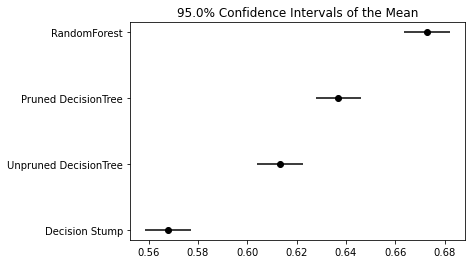

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_noise, labels, test_size=0.2, random_state=RANDOM_STATE)
mult_results = compare_models(X_train, X_test, y_train, y_test)

RankResult(rankdf=
                                  meanrank      mean       std  ci_lower  \
RandomForest                        2.0125  0.671312  0.050807  0.661383   
Mult Noise RandomForest             2.5100  0.672750  0.052776  0.658164   
Pruned DecisionTree                 2.9425  0.642500  0.053593  0.632026   
Unpruned DecisionTree               3.8525  0.609500  0.053947  0.598957   
Mult Noise Pruned DecisionTree      3.9300  0.636875  0.051810  0.622556   
Mult Noise Unpruned DecisionTree    4.8600  0.613125  0.050639  0.599129   
Decision Stump                      5.1925  0.563688  0.045556  0.554784   
Mult Noise Decision Stump           6.7000  0.567875  0.046948    0.5549   

                                  ci_upper effect_size   magnitude  
RandomForest                      0.681242         0.0  negligible  
Mult Noise RandomForest           0.687336   -0.027751  negligible  
Pruned DecisionTree               0.652974     0.55177      medium  
Unpruned DecisionTre

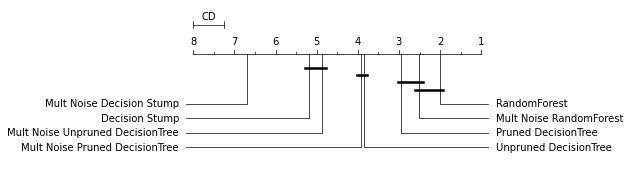

In [27]:
for result in mult_results:
    mult_results["Mult Noise " + result] = mult_results[result]
# Show results
combined = pd.concat([results, mult_results])
result = autorank(combined, verbose=False)
print(result)
create_report(result)
plot_stats(result)

### Answers
Comparing the results of multiplicative noise to the base method, there are significant results for pruned decision dree, unpruned decision tree, and decision stump.
The pruned decision tree is significantly worse. This could be caused by decision branches being worse generally as inputs are less predictive of the outputs.
The unpruned decision tree is significantly better, this may be due to better generalisation, as the inputs are more generalised while the model stays the same, it has to deal with greater variation and unpredictability in the input space.
The decision stump is significantly worse, this may be due to the same reason as for pruned decision tree.
The results for additive and multiplicative noise are generally very similar. Looking at the data, this can be explained as most values are between -10 and 10, there is not a significant difference between multiplying noise and adding noise. If the input space spanned many magnitudes the difference may be more obvious.

## 6. 5% Class Noise

In [28]:
flip = labels.sample(frac=0.05)
y_flip = labels.copy()
for index, row in flip.iterrows():
    y_flip.loc[index] = 0 if labels.loc[index][0] == 1 else 1

### Comparing Models

RankResult(rankdf=
                       meanrank      mean       std  ci_lower  ci_upper  \
RandomForest              1.560  0.640125  0.051102  0.630883  0.649367   
Pruned DecisionTree       2.115  0.610250  0.049536  0.601008  0.619492   
Unpruned DecisionTree     2.660  0.587625  0.053845  0.578383  0.596867   
Decision Stump            3.665  0.528375  0.047965  0.519133  0.537617   

                      effect_size   magnitude  
RandomForest                  0.0  negligible  
Pruned DecisionTree      0.593638      medium  
Unpruned DecisionTree    1.000163       large  
Decision Stump           2.254911       large  
pvalue=5.206889808089021e-52
cd=None
omnibus=anova
posthoc=tukeyhsd
all_normal=True
pvals_shapiro=[0.7386086583137512, 0.49564671516418457, 0.7481617331504822, 0.13993220031261444]
homoscedastic=True
pval_homogeneity=0.6951154663490663
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.0125
num_samples=100
posterior_matrix=
None
decision_matrix=
None
rope=Non

C:\Users\aiden\.conda\envs\venv\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


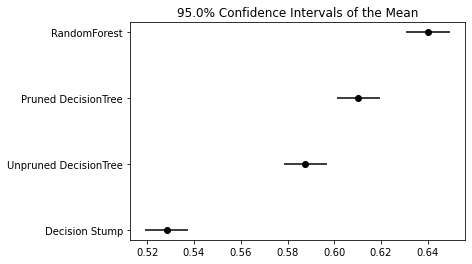

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, y_flip, test_size=0.2, random_state=RANDOM_STATE)
class_results = compare_models(X_train, X_test, y_train, y_test)

RankResult(rankdf=
                                   meanrank      mean       std  ci_lower  \
RandomForest                         2.0675  0.655000  0.052107  0.644817   
Class Noise RandomForest             2.6200  0.640125  0.051102  0.626002   
Pruned DecisionTree                  2.8425  0.629188  0.055553  0.618331   
Class Noise Pruned DecisionTree      3.7300  0.610250  0.049536  0.596559   
Unpruned DecisionTree                3.8325  0.596750  0.056101  0.585786   
Class Noise Unpruned DecisionTree    4.8200  0.587625  0.053845  0.572743   
Decision Stump                       5.2575  0.543937  0.048469  0.534465   
Class Noise Decision Stump           6.8300  0.528375  0.047965  0.515118   

                                   ci_upper effect_size   magnitude  
RandomForest                       0.665183         0.0  negligible  
Class Noise RandomForest           0.654248    0.288237       small  
Pruned DecisionTree                0.640044    0.479272       small  
Class N

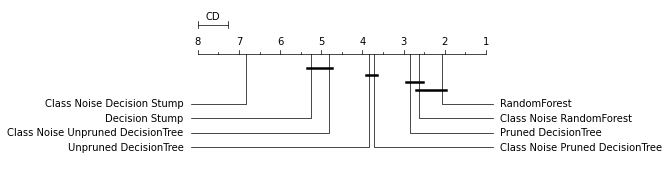

In [30]:
for result in class_results:
    class_results["Class Noise " + result] = class_results[result]
# Show results
combined = pd.concat([results, class_results])
result = autorank(combined, verbose=False)
print(result)
create_report(result)
plot_stats(result)

### Answers
Decision stump performed worse on the test data by 12% compared to no noise.

Comparing the results of class noise to the base method, there are significant results for pruned decision dree, unpruned decision tree, and decision stump.
The pruned decision tree is significantly worse. This could be caused by decision branches being worse generally as inputs are less predictive of the outputs.
The unpruned decision tree is significantly better, this may be due to better generalisation, as the inputs are more generalised while the model stays the same, it has to deal with greater variation and unpredictability in the input space.
The decision stump is significantly worse, this may be due to the same reason as for pruned decision tree.

## 7. Train and Test Split

### Add noise to training set

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=RANDOM_STATE)
# Add multiplicative noise
X_noise = multiplicativeNoise(X_train)

RankResult(rankdf=
                       meanrank      mean       std  ci_lower  ci_upper  \
RandomForest               1.33  0.668250  0.048702  0.659063  0.677437   
Pruned DecisionTree        2.41  0.617875  0.049245  0.608688  0.627062   
Unpruned DecisionTree      2.71  0.610250  0.057499  0.601063  0.619437   
Decision Stump             3.55  0.560250  0.045170  0.551063  0.569437   

                      effect_size   magnitude  
RandomForest                  0.0  negligible  
Pruned DecisionTree      1.028602       large  
Unpruned DecisionTree    1.088539       large  
Decision Stump            2.29937       large  
pvalue=8.567815200641235e-48
cd=None
omnibus=anova
posthoc=tukeyhsd
all_normal=True
pvals_shapiro=[0.10380086302757263, 0.09705814719200134, 0.3442695736885071, 0.1916331946849823]
homoscedastic=True
pval_homogeneity=0.09882670707054891
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.0125
num_samples=100
posterior_matrix=
None
decision_matrix=
None
rope=No

C:\Users\aiden\.conda\envs\venv\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


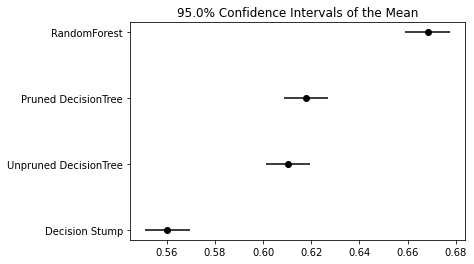

In [32]:
train_results = compare_models(X_noise, X_test, y_train, y_test)
for result in train_results:
    train_results["Test noise " + result] = train_results[result]

### Add noise to test set

RankResult(rankdf=
                       meanrank      mean       std  ci_lower  ci_upper  \
RandomForest              1.515  0.669875  0.048983  0.657413  0.682337   
Pruned DecisionTree       1.955  0.648125  0.055002  0.634132  0.662118   
Unpruned DecisionTree     2.845  0.605875  0.057088  0.591351  0.620399   
Decision Stump            3.685  0.559500  0.043957  0.548317  0.570683   

                      effect_size   magnitude  
RandomForest                  0.0  negligible  
Pruned DecisionTree      0.417634       small  
Unpruned DecisionTree    1.203239       large  
Decision Stump           2.371741       large  
pvalue=2.6665159015190102e-37
cd=0.46903593329832804
omnibus=friedman
posthoc=nemenyi
all_normal=True
pvals_shapiro=[0.22651080787181854, 0.029995987191796303, 0.17797085642814636, 0.14355461299419403]
homoscedastic=False
pval_homogeneity=0.04445466146540819
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.0125
num_samples=100
posterior_matrix=
None
decisio

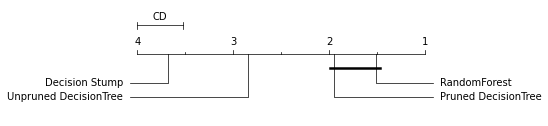

In [33]:
X_noise_test = multiplicativeNoise(X_test)
test_results = compare_models(X_train, X_noise_test, y_train, y_test)

RankResult(rankdf=
                                  meanrank      mean       std  ci_lower  \
RandomForest                         2.345  0.669063  0.048727   0.65954   
Test noise RandomForest              2.345  0.669063  0.048727   0.65954   
Pruned DecisionTree                  3.865  0.633000  0.054234  0.622401   
Test noise Pruned DecisionTree       3.865  0.633000  0.054234  0.622401   
Unpruned DecisionTree                5.055  0.608062  0.057192  0.596886   
Test noise Unpruned DecisionTree     5.055  0.608062  0.057192  0.596886   
Decision Stump                       6.735  0.559875  0.044457  0.551187   
Test noise Decision Stump            6.735  0.559875  0.044457  0.551187   

                                  ci_upper effect_size   magnitude  
RandomForest                      0.678585         0.0  negligible  
Test noise RandomForest           0.678585         0.0  negligible  
Pruned DecisionTree               0.643599    0.699511      medium  
Test noise Pruned De

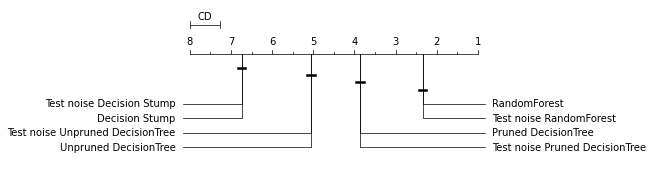

In [34]:
for result in test_results:
    test_results["Test noise " + result] = test_results[result]
# Show results
combined = pd.concat([train_results, test_results])
result = autorank(combined, verbose=False)
print(result)
create_report(result)
plot_stats(result)

### Answers
It can be observed that adding noise to the test data improved the test scores for random forest, unpruned decision tree, and decision stump.
No significant differences between the models though based on cross validation, but this only uses test data